In [2]:
import matplotlib.pyplot as pyplot
import numpy
import GazeParser

def drawScatterPlot(data, image, pathtosave):
    imagePath = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/4/' + image
    img = pyplot.imread(imagePath)
    fig, ax = pyplot.subplots()
    if isinstance(data, GazeParser.GazeData):
        xy = data.getFixCenter()
        dur = data.getFixDur()
    else:
        xy = numpy.zeros((2, len(data)))
        dur = numpy.zeros(len(data))
        for i in range(len(data)):
            xy[i, :] = data[i].center
            dur[i] = data[i].duration
            
    ax.imshow(img, extent=[-640, 640, -360, 360])
    ax.plot(xy[:, 0], xy[:, 1], 'k-')
    for idx in range(xy.shape[0]):
        ax.text(xy[idx, 0], xy[idx, 1], str(idx+1))
    ax.scatter(xy[:, 0], xy[:, 1], s=dur, c=dur, alpha=0.7)
    pyplot.xlim(-960, 960)
    pyplot.ylim(-540, 540)
    pyplot.savefig(pathtosave + '/' + image + '.png')

In [24]:
import os
from GazeParser import Converter
import GazeParser

dataDir   = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Data/'
dataFiles = os.listdir(dataDir)
dataFiles.remove('.DS_Store')

for sub in dataFiles:
    subDir      = os.path.join(dataDir, sub)
    subFiles    = os.listdir(subDir)
    subPlotPath = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Plots/' + sub
    for file in subFiles:
        if (file[-3:] == 'csv'):
            fileName = os.path.join(subDir, file)
            d        = Converter.TrackerToGazeParser(fileName)
            # drawScatterPlot(d[0], 'Slide' + fileName.split('/')[-1].split('.')[0] + '.PNG', subPlotPath)


In [ ]:
import os
from GazeParser import Converter
import GazeParser

dataDir   = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Data/'
dataFiles = os.listdir(dataDir)
dataFiles.remove('.DS_Store')

for sub in dataFiles:
    subDir      = os.path.join(dataDir, sub)
    subFiles    = os.listdir(subDir)
    subPlotPath = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Plots/' + sub
    for file in subFiles:
        if (file[-2:] == 'db'):
            fileName = os.path.join(subDir, file)
            d, a     = GazeParser.load(fileName)
            drawScatterPlot(d[0], 'Slide' + fileName.split('/')[-1].split('.')[0] + '.PNG', subPlotPath)


In [ ]:
import os
from GazeParser import Converter
import GazeParser
import pandas as pd
import numpy as np

dataDir   = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Data/'
dataFiles = os.listdir(dataDir)
dataFiles.remove('.DS_Store')

for sub in dataFiles:
    df = pd.DataFrame([], columns=['ImgName', 'SacNum', 'TimeSpent', 'SacRate', 'SacAmp'])
    subDir      = os.path.join(dataDir, sub)
    subFiles    = os.listdir(subDir)
    print(subDir)
    for file in subFiles:
        if (file[-2:] == 'db'):
            fileName = os.path.join(subDir, file)
            d, a     = GazeParser.load(fileName)
            tSpent   = (d[0].T[-1] - d[0].T[0]) / 1000
            numSac   = d[0].nSac
            df_list  = ['Slide' + fileName.split('/')[-1].split('.')[0] + '.png', numSac, tSpent, numSac/tSpent, np.mean(d[0].getSacAmp())]
            df.loc[len(df)] = df_list
    sumCols   = ['SacNum', 'TimeSpent']
    meanCols  = ['SacRate']
    totalVals = [" Total ", df[sumCols].sum(axis=0).values[0], df[sumCols].sum(axis=0).values[1], df[meanCols].mean(axis=0).values[0],
                np.mean(d[0].getSacAmp())]
    df.loc[len(df)] = totalVals
    df.to_csv('/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/' + subDir.split('/')[-1] + '.csv', index=False)

# Analysis

## Compare Saccade Amplitudes

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

auEyeDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/EyeResults/autism/'
tdEyeDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/EyeResults/td/'

auSacAmps   = []
tdSacAmps   = []

for auSub in os.listdir(auEyeDir):
    subDF = pd.read_csv(os.path.join(auEyeDir, auSub))
    if np.isnan(subDF.iloc[-1].SacAmp):
        continue
    auSacAmps.append(subDF.iloc[-1].SacAmp)
    
dataFiles = os.listdir(tdEyeDir)
dataFiles.remove('.DS_Store')    

for tdSub in dataFiles:
    subDF = pd.read_csv(os.path.join(tdEyeDir, tdSub))
    if np.isnan(subDF.iloc[-1].SacAmp):
        continue
    tdSacAmps.append(subDF.iloc[-1].SacAmp)

In [15]:
auSacAmps

[3.431431925460038,
 1.6087563058612082,
 1.7102083579425804,
 3.7057762593661607,
 4.820860330771813,
 4.02334689972978,
 4.801336251276739,
 1.2691987145577883,
 4.398352867974652,
 1.8322962136092384,
 3.535168637839861,
 1.6948701473973449,
 1.4095546964782513,
 3.2233504265187487]

In [16]:
# Calculate the average
asd_mean = np.nanmean(auSacAmps)
td_mean  = np.mean(tdSacAmps)

# Calculate the standard deviation
asd_std = np.nanstd(auSacAmps) / np.sqrt(len(auSacAmps)-1)
td_std  = np.std(tdSacAmps) / np.sqrt(len(tdSacAmps))

In [17]:
Groups = ['ASD', 'TD']
x_pos = np.arange(len(Groups))
CTEs = [asd_mean, td_mean]
error = [asd_std, td_std]

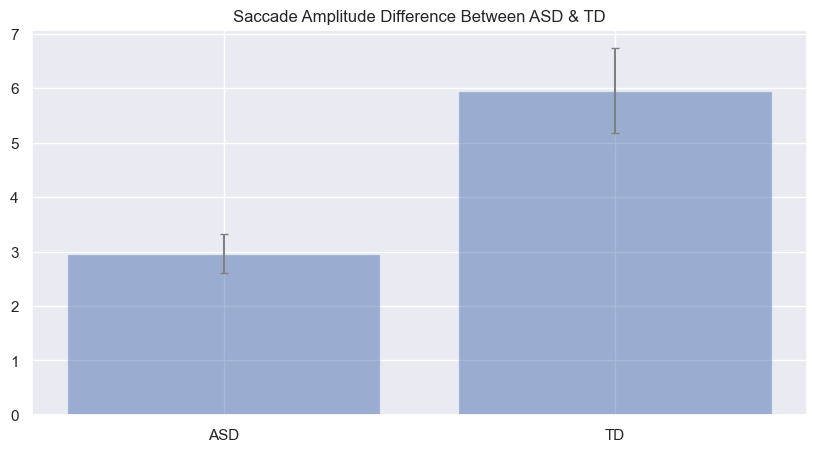

In [18]:
x_pos = np.arange(2)
sns.set()
# Build the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='grey', capsize=3)
ax.set_xticks(x_pos)
ax.set_xticklabels(Groups)
ax.set_title("Saccade Amplitude Difference Between ASD & TD")

# Save the figure and show
plt.savefig('Saccade_Amplitude_Barplot.png')
plt.show()

In [19]:
from scipy.stats import ranksums
ranksums(auSacAmps, tdSacAmps)

RanksumsResult(statistic=-2.702085727934255, pvalue=0.006890599339559992)

## Compare Saccade Rates

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

auEyeDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/EyeResults/autism/'
tdEyeDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/EyeResults/td/'

auSacRate   = []
tdSacRate   = []

for auSub in os.listdir(auEyeDir):
    subDF = pd.read_csv(os.path.join(auEyeDir, auSub))
    if np.isnan(subDF.iloc[-1].SacRate):
        continue
    auSacRate.append(subDF.iloc[-1].SacRate)
    
dataFiles = os.listdir(tdEyeDir)
dataFiles.remove('.DS_Store')    

for tdSub in dataFiles:
    subDF = pd.read_csv(os.path.join(tdEyeDir, tdSub))
    if np.isnan(subDF.iloc[-1].SacRate):
        continue
    tdSacRate.append(subDF.iloc[-1].SacRate)

In [22]:
# Calculate the average
asd_mean = np.mean(auSacRate)
td_mean  = np.mean(tdSacRate)

# Calculate the standard deviation
asd_std = np.std(auSacRate) / np.sqrt(len(auSacRate))
td_std  = np.std(tdSacRate) / np.sqrt(len(tdSacRate))

In [23]:
Groups = ['ASD', 'TD']
x_pos = np.arange(len(Groups))
CTEs = [asd_mean, td_mean]
error = [asd_std, td_std]

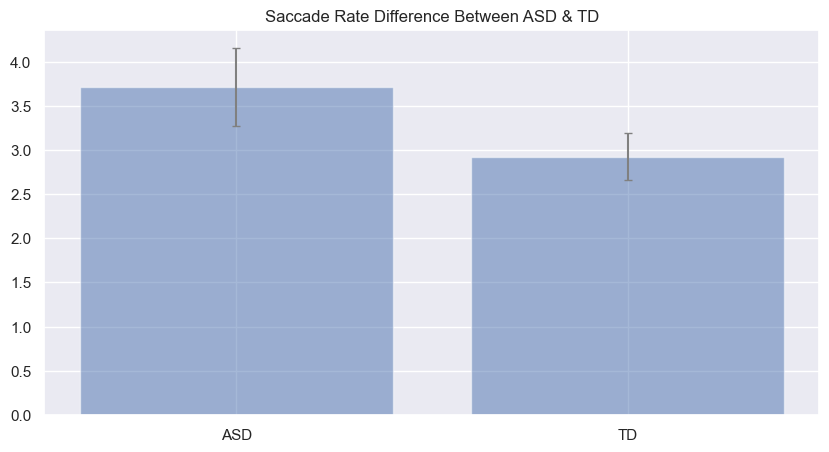

In [25]:
x_pos = np.arange(2)
sns.set()
# Build the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='grey', capsize=3)
ax.set_xticks(x_pos)
ax.set_xticklabels(Groups)
ax.set_title("Saccade Rate Difference Between ASD & TD")

# Save the figure and show
plt.savefig('Saccade_Rate_Barplot.png')
plt.show()

In [27]:
from scipy.stats import ranksums
ranksums(auSacRate, tdSacRate)

RanksumsResult(statistic=1.4625534178278754, pvalue=0.14358961746974888)

## Compare Time Spents

In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

auEyeDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/EyeResults/autism/'
tdEyeDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/EyeResults/td/'

auTimeSpent = []
tdTimeSpent = []

for auSub in os.listdir(auEyeDir):
    subDF = pd.read_csv(os.path.join(auEyeDir, auSub))
    if np.isnan(subDF.iloc[-1].TimeSpent):
        continue
    auTimeSpent.append(subDF.iloc[-1].TimeSpent)
    
dataFiles = os.listdir(tdEyeDir)
dataFiles.remove('.DS_Store')    

for tdSub in dataFiles:
    subDF = pd.read_csv(os.path.join(tdEyeDir, tdSub))
    if np.isnan(subDF.iloc[-1].TimeSpent):
        continue
    tdTimeSpent.append(subDF.iloc[-1].TimeSpent)

In [30]:
# Calculate the average
asd_mean = np.mean(auTimeSpent)
td_mean  = np.mean(tdTimeSpent)

# Calculate the standard deviation
asd_std = np.std(auTimeSpent) / np.sqrt(len(auTimeSpent))
td_std  = np.std(tdTimeSpent) / np.sqrt(len(tdTimeSpent))

In [31]:
Groups = ['ASD', 'TD']
x_pos = np.arange(len(Groups))
CTEs = [asd_mean, td_mean]
error = [asd_std, td_std]

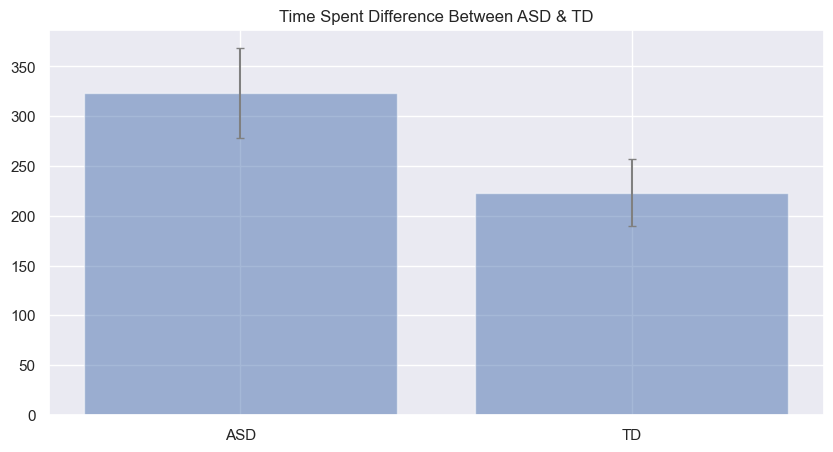

In [34]:
x_pos = np.arange(2)
sns.set()
# Build the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='grey', capsize=3)
ax.set_xticks(x_pos)
ax.set_xticklabels(Groups)
ax.set_title("Time Spent Difference Between ASD & TD")

# Save the figure and show
plt.savefig('Time_Spent_Barplot.png')
plt.show()

In [35]:
from scipy.stats import ranksums
ranksums(auTimeSpent, tdTimeSpent)

RanksumsResult(statistic=2.569350598886808, pvalue=0.010188931556774536)

## Microsaccade vs Verbal Total

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

auEyeDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/EyeResults/autism/'
tdEyeDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/EyeResults/td/'

auVerbalCSV = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/VerbalResults/autism.xlsx'
tdVerbalCSV = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/VerbalResults/td.xlsx'

auGARSCSV   = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/VerbalResults/autism gars.xlsx'
tdGARSCSV   = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/VerbalResults/td gars.xlsx'

auVerbalDF = pd.read_excel(auVerbalCSV)
tdVerbalDF = pd.read_excel(tdVerbalCSV)

auGARSDF = pd.read_excel(auGARSCSV)
tdGARSDF = pd.read_excel(tdGARSCSV)

wholeDataDF = pd.DataFrame(columns = ['Name', 'TimeSpent', 'SaccadeRate', 'SaccadeAmp', 'VerbalNum', 'GARS', 'Type'])

for auSub in os.listdir(auEyeDir):
    subList = []
    subDF = pd.read_csv(os.path.join(auEyeDir, auSub))
    subList.append(auSub.split(".")[0])
    subList.append(subDF.iloc[-1].TimeSpent)
    subList.append(subDF.iloc[-1].SacRate)
    subList.append(subDF.iloc[-1].SacAmp)
    subList.append(auVerbalDF[auVerbalDF.name == auSub.split(".")[0]].total.values[0])
    subList.append(auGARSDF[auGARSDF.name == auSub.split(".")[0]].total.values[0])
    subList.append('au')
    wholeDataDF.loc[len(wholeDataDF)] = subList
    
dataFiles = os.listdir(tdEyeDir)
dataFiles.remove('.DS_Store')    

for tdSub in dataFiles:
    subList = []
    subDF = pd.read_csv(os.path.join(tdEyeDir, tdSub))
    subList.append(tdSub.split(".")[0])
    subList.append(subDF.iloc[-1].TimeSpent)
    subList.append(subDF.iloc[-1].SacRate)
    subList.append(subDF.iloc[-1].SacAmp)
    subList.append(tdVerbalDF[tdVerbalDF.name == tdSub.split(".")[0]].total.values[0])
    subList.append(tdGARSDF[tdGARSDF.name == tdSub.split(".")[0]].total.values[0])
    subList.append('td')
    wholeDataDF.loc[len(wholeDataDF)] = subList

In [39]:
wholeDataDF

,Name,TimeSpent,SaccadeRate,SaccadeAmp,VerbalNum,GARS,Type
0,kiyan rajabi,275.128247,4.199787,3.431432,96,57,au
1,barsam feyzabadi,512.236928,4.047215,1.608756,105,56,au
2,amir parham nagavandi,393.023670,4.704961,1.710208,94,50,au
3,behrad mohamadiyan,327.913540,1.325687,3.705776,96,57,au
4,daroni,300.326586,1.858999,4.820860,100,59,au
5,amir mohamad zamani,171.875008,2.999791,NaN,117,59,au
6,sara fakhori,227.083883,3.850665,4.023347,85,70,au
7,karen oshkob,196.270627,3.525735,4.801336,99,61,au
8,mostafavi,870.329234,3.144739,1.269199,100,57,au
9,maniya shiri,158.393304,1.458696,4.398353,101,70,au


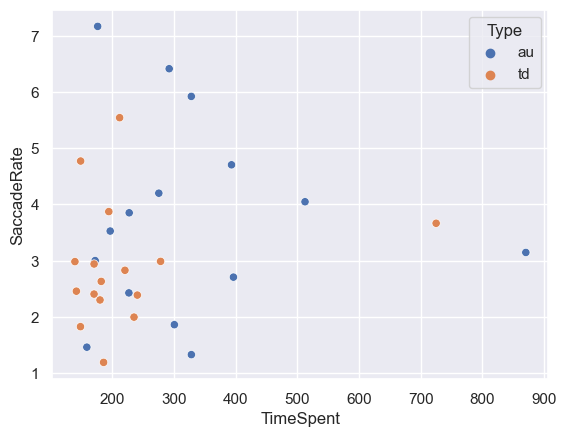

In [49]:
sns.set()
sns.scatterplot(data=wholeDataDF, x="TimeSpent", y="SaccadeRate", hue="Type")
plt.savefig("SacRateVSTimeSpent.png");

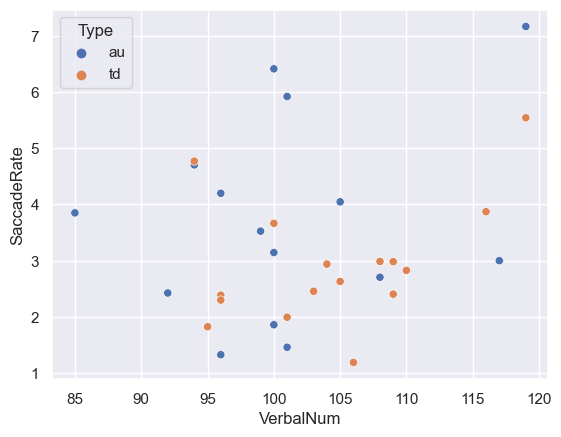

In [50]:
sns.scatterplot(data=wholeDataDF, x="VerbalNum", y="SaccadeRate", hue="Type")
plt.savefig("SacRateVSVerbalNum.png");

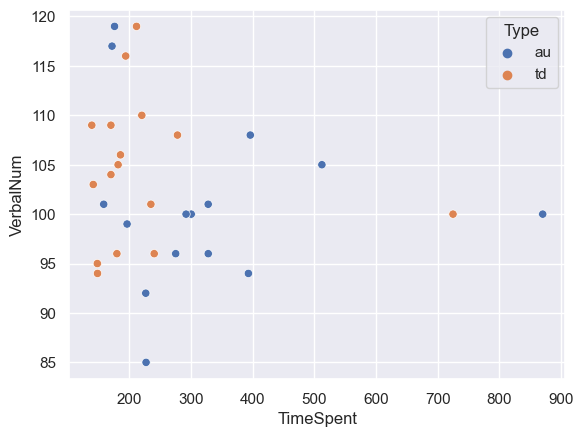

In [51]:
sns.scatterplot(data=wholeDataDF, x="TimeSpent", y="VerbalNum", hue="Type")
plt.savefig("VerbalNumVSTimeSpent.png");

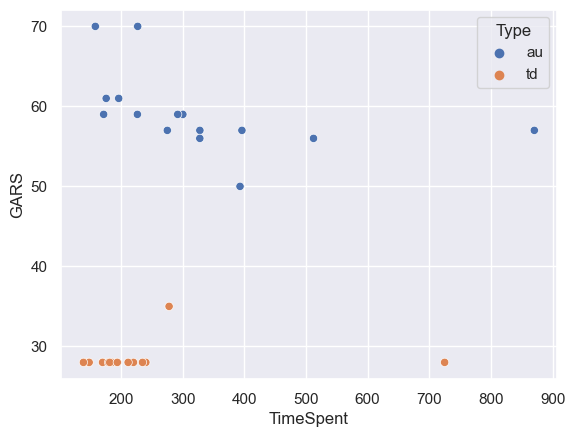

In [52]:
sns.scatterplot(data=wholeDataDF, x="TimeSpent", y="GARS", hue="Type")
plt.savefig("GarsVSTimeSpent.png");

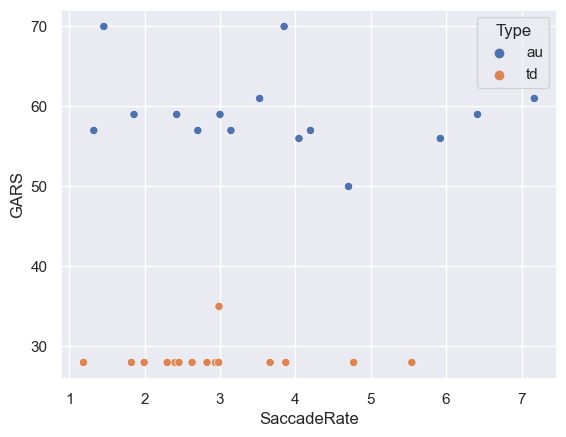

In [53]:
sns.scatterplot(data=wholeDataDF, x="SaccadeRate", y="GARS", hue="Type")
plt.savefig("SacRateVSGars.png");

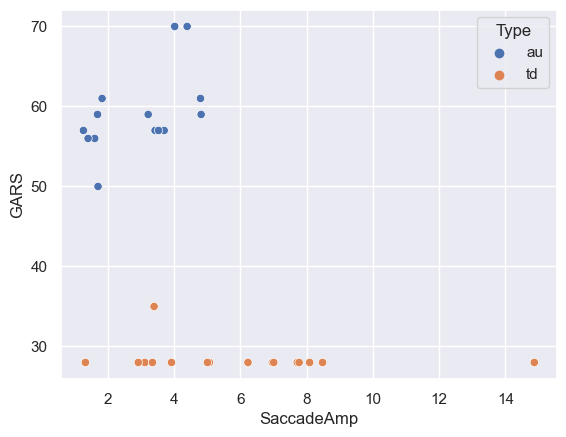

In [54]:
sns.scatterplot(data=wholeDataDF, x="SaccadeAmp", y="GARS", hue="Type")
plt.savefig("SacAmpVSGars.png");

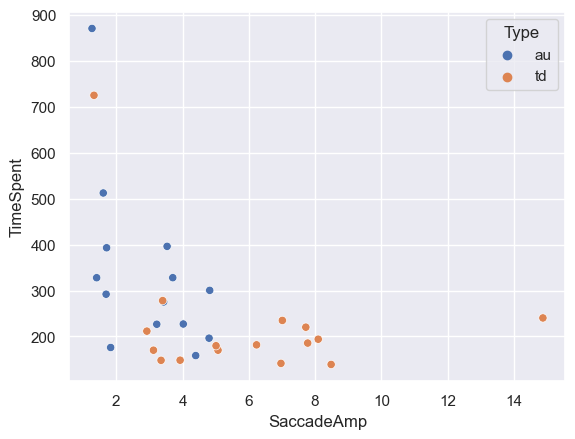

In [55]:
sns.scatterplot(data=wholeDataDF, x="SaccadeAmp", y="TimeSpent", hue="Type")
plt.savefig("SacAmpVSTimeSpent.png");

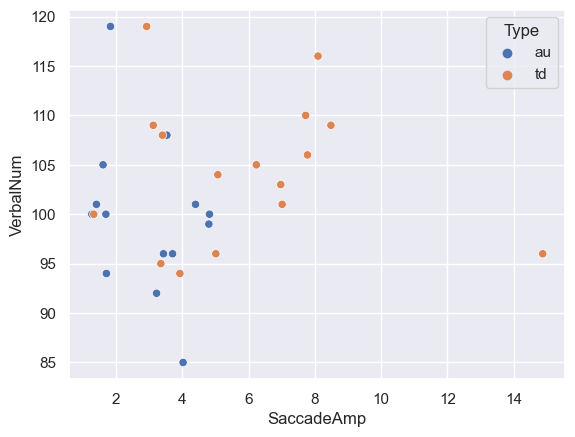

In [56]:
sns.scatterplot(data=wholeDataDF, x="SaccadeAmp", y="VerbalNum", hue="Type")
plt.savefig("SacAmpVSVerbalNum.png");

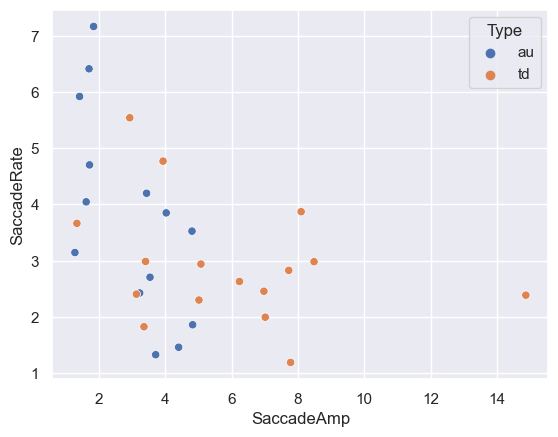

In [57]:
sns.scatterplot(data=wholeDataDF, x="SaccadeAmp", y="SaccadeRate", hue="Type")
plt.savefig("SacAmpVSSacRate.png");

# Classifications

In [200]:
import os
import GazeParser
from natsort import natsorted
import pandas as pd
import numpy as np
from sklearn.model_selection import LeavePOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [201]:
def svm_au_td(au_data, td_data, n_iters):
    au_labels  = np.ones(au_data.shape[0])
    td_labels  = np.zeros(td_data.shape[0])
    total_data = np.concatenate((au_data, td_data), axis = 0)
    total_labels = np.concatenate((au_labels, td_labels), axis = 0)
    
    accuracy = np.zeros(n_iters)
    for iter in range(n_iters):
        X_train, X_test, y_train, y_test = train_test_split(total_data, total_labels, test_size=0.2, stratify=total_labels)
        clf                  = make_pipeline(SVC(kernel='rbf'))
        clf.fit(X_train, y_train)
        y_pred               = clf.predict(X_test)
        accuracy[iter] = accuracy_score(y_test, y_pred)
        
    return accuracy

In [202]:
imagesDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Task/Images/4/'
dataDir   = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Data'
verbalDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/VerbalResults/'

imagesName         = natsorted(os.listdir(imagesDir))
exceptionName      = 'javid asadi'
subjectFoldersName = natsorted(os.listdir(dataDir))
imagesName.remove('Slide1.PNG')
subjectFoldersName.remove('.DS_Store')
subjectFoldersName.remove(exceptionName)

## Using Fixation Center

In [198]:
subjectsDict = {}
auDF = pd.read_excel(os.path.join(verbalDir, 'autism.xlsx'))
tdDF = pd.read_excel(os.path.join(verbalDir, 'td.xlsx'))

for name in auDF.name.values:
    if name != exceptionName:
        subjectsDict[name] = 'au'
        
for name in tdDF.name.values:
    if name != exceptionName:
        subjectsDict[name] = 'td'

for image in imagesName:
    temp   = []
    auEyeDataR = []
    auEyeDataL = []
    tdEyeDataR = []
    tdEyeDataL = []
    imageNum = image.split(".")[0].split("Slide")[1]
    for subject in subjectFoldersName:
        subjectImageData = os.path.join(dataDir, subject, imageNum + '.db')
        d, a     = GazeParser.load(subjectImageData)
        temp.append((d[0].getFixCenter()))
        if subjectsDict[subject] == 'au':
            for data in d[0].getFixCenter():
                auEyeDataR.append(data[0])
                auEyeDataL.append(data[1])
        else:
            for data in d[0].getFixCenter():
                tdEyeDataR.append(data[0])
                tdEyeDataL.append(data[1])
    auEyeData = np.array((auEyeDataR, auEyeDataL)).transpose()
    tdEyeData = np.array((tdEyeDataR, tdEyeDataL)).transpose()
    accuracy  = svm_au_td(auEyeData, tdEyeData, 100)
    print(np.mean(accuracy))
        

0.6035
0.6217616580310883
0.6110526315789473
0.66151724137931
0.6377310924369745
0.7347058823529412
0.7086614173228343
0.7768595041322313
0.614537037037037
0.5869911504424778
0.607953216374269
0.6453543307086613
0.6544117647058824
0.6407142857142857
0.6498930481283424
0.6204918032786886
0.6887179487179488
0.6646666666666665
0.5886503067484662
0.6298136645962731
0.6774193548387096
0.6632571428571429
0.7153448275862072
0.6738749999999999
0.7030508474576272
0.5703999999999999
0.6242335766423358
0.6076799999999998
0.6376129032258064
0.6863432835820896
0.6312949640287769
0.6174999999999998
0.6684732824427477
0.6641071428571429
0.6323703703703704
0.6938775510204083
0.6193793103448275
0.639240506329114
0.624469696969697
0.6168224299065421


## Using ...

In [204]:
subjectsDict = {}
auDF = pd.read_excel(os.path.join(verbalDir, 'autism.xlsx'))
tdDF = pd.read_excel(os.path.join(verbalDir, 'td.xlsx'))

for name in auDF.name.values:
    if name != exceptionName:
        subjectsDict[name] = 'au'
        
for name in tdDF.name.values:
    if name != exceptionName:
        subjectsDict[name] = 'td'

for image in imagesName:
    temp   = []
    auEyeDataR = []
    auEyeDataL = []
    tdEyeDataR = []
    tdEyeDataL = []
    imageNum = image.split(".")[0].split("Slide")[1]
    for subject in subjectFoldersName:
        subjectImageData = os.path.join(dataDir, subject, imageNum + '.db')
        d, a     = GazeParser.load(subjectImageData)
        temp.append((d[0].getSacAmp()))
        print(temp)
    break
        # if subjectsDict[subject] == 'au':
        #     for data in d[0].getSacAmp():
        #         auEyeDataR.append(data[0])
        #         auEyeDataL.append(data[1])
        # else:
            # for data in d[0].getSacAmp():
            #     tdEyeDataR.append(data[0])
            #     tdEyeDataL.append(data[1])
    # auEyeData = np.array((auEyeDataR, auEyeDataL)).transpose()
    # tdEyeData = np.array((tdEyeDataR, tdEyeDataL)).transpose()
    # accuracy  = svm_au_td(auEyeData, tdEyeData, 100)
    # print(np.mean(accuracy))
        

[array([[0.38206523],
       [5.03772662],
       [1.08240285],
       [0.67695833],
       [2.77755316],
       [4.43334767],
       [1.20548671],
       [0.68657626],
       [1.40968124],
       [0.74028218],
       [3.84800767],
       [5.08459774],
       [1.30295155],
       [1.10417163],
       [0.71745322],
       [0.55702534],
       [0.50325647],
       [1.8138756 ],
       [3.23782551],
       [0.85452265],
       [1.7271098 ],
       [0.64212251],
       [3.53158   ],
       [1.54875407],
       [0.74116512],
       [0.5330098 ],
       [0.49767276],
       [1.00230161],
       [2.94813781],
       [0.21848331]])]
[array([[0.38206523],
       [5.03772662],
       [1.08240285],
       [0.67695833],
       [2.77755316],
       [4.43334767],
       [1.20548671],
       [0.68657626],
       [1.40968124],
       [0.74028218],
       [3.84800767],
       [5.08459774],
       [1.30295155],
       [1.10417163],
       [0.71745322],
       [0.55702534],
       [0.50325647],
       [1

In [207]:
np.mean(d[0].getSacAmp())

3.4010889258309778

In [206]:
temp[0]

array([[0.38206523],
       [5.03772662],
       [1.08240285],
       [0.67695833],
       [2.77755316],
       [4.43334767],
       [1.20548671],
       [0.68657626],
       [1.40968124],
       [0.74028218],
       [3.84800767],
       [5.08459774],
       [1.30295155],
       [1.10417163],
       [0.71745322],
       [0.55702534],
       [0.50325647],
       [1.8138756 ],
       [3.23782551],
       [0.85452265],
       [1.7271098 ],
       [0.64212251],
       [3.53158   ],
       [1.54875407],
       [0.74116512],
       [0.5330098 ],
       [0.49767276],
       [1.00230161],
       [2.94813781],
       [0.21848331]])

# Dehghan Orders

## Sentences

In [2]:
import os
import GazeParser
from natsort import natsorted
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
imagesDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Task/Images/4/'
dataDir   = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Data'
verbalDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/VerbalResults/'

imagesName         = natsorted(os.listdir(imagesDir))
exceptionName      = 'javid asadi'
subjectFoldersName = natsorted(os.listdir(dataDir))
imagesName.remove('Slide1.PNG')
subjectFoldersName.remove('.DS_Store')
subjectFoldersName.remove(exceptionName)

In [ ]:
def save_and_plot(data, imagepath, pathtosave, image, type):
    img = plt.imread(imagepath)
    plt.figure()
    plt.imshow(img, extent=[-600, 600, -500, 500])
    plt.plot(data[:, 0], data[:, 1], 'r.' , alpha=0.2)
    plt.xlim(-960, 960)
    plt.ylim(-540, 540)
    plt.savefig(os.path.join(pathtosave, image))

subjectsDict = {}
auDF         = pd.read_excel(os.path.join(verbalDir, 'autism.xlsx'))
tdDF         = pd.read_excel(os.path.join(verbalDir, 'td.xlsx'))
imagesPath   = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Task/Images/4/'
auPathtosave = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/Dehghan/1/au/'
tdPathtosave = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/Dehghan/1/td/'

for name in auDF.name.values:
    if name != exceptionName:
        subjectsDict[name] = 'au'
        
for name in tdDF.name.values:
    if name != exceptionName:
        subjectsDict[name] = 'td'

for image in imagesName:
    print(image)
    temp   = []
    auEyeDataR = []
    auEyeDataL = []
    tdEyeDataR = []
    tdEyeDataL = []
    imageNum = image.split(".")[0].split("Slide")[1]
    for subject in subjectFoldersName:
        subjectImageData = os.path.join(dataDir, subject, imageNum + '.db')
        d, a     = GazeParser.load(subjectImageData)
        temp.append((d[0].getFixCenter()))
        if subjectsDict[subject] == 'au':
            for data in d[0].getFixCenter():
                auEyeDataR.append(data[0])
                auEyeDataL.append(data[1])
        else:
            for data in d[0].getFixCenter():
                tdEyeDataR.append(data[0])
                tdEyeDataL.append(data[1])
    auEyeData = np.array((auEyeDataR, auEyeDataL)).transpose()
    tdEyeData = np.array((tdEyeDataR, tdEyeDataL)).transpose()
    save_and_plot(data=auEyeData, imagepath=os.path.join(imagesPath, image), pathtosave=auPathtosave, image=image)
    save_and_plot(data=tdEyeData, imagepath=os.path.join(imagesPath, image), pathtosave=tdPathtosave, image=image)

In [108]:
os.path.join(imagesPath, image)

'/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Task/Images/4/Slide41.PNG'

In [107]:
image

'Slide41.PNG'

## Words

In [1]:
import os
import GazeParser
from natsort import natsorted
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
wordTypes  = 3
wordsDir   = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Task/Images/'
dataDir    = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Data/Words/'
verbalDir  = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/VerbalResults/'
resultsDir = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/Dehghan/Words/'

subjectFoldersName = natsorted(os.listdir(dataDir))
subjectFoldersName.remove('.DS_Store')

In [6]:
def save_and_plot(data, imagepath, pathtosave, image, type):
    savepath = os.path.join(pathtosave, type)
    if not os.path.exists(savepath):
        os.makedirs(savepath)
    img = plt.imread(imagepath)
    plt.figure()
    plt.imshow(img, extent=[-600, 600, -500, 500])
    plt.plot(data[:, 0], data[:, 1], 'r.' , alpha=0.2)
    plt.xlim(-960, 960)
    plt.ylim(-540, 540)
    plt.savefig(os.path.join(savepath, image))

for wtype in range(1, wordTypes+1):
    currWordDir  = os.path.join(wordsDir, str(wtype))
    currWordImgs = natsorted(os.listdir(currWordDir))
    if '.DS_Store' in currWordImgs:
        currWordImgs.remove('.DS_Store')
    currWordImgs.remove('Slide1.PNG')
    for subject in subjectFoldersName:
        df = pd.DataFrame(columns = ['Image', 'Saccade Duration', 'Number of Fixations'])
        print(subject)
        fixationData = []
        for img in currWordImgs:
            imgPath  = os.path.join(currWordDir, img)
            imgNum   = img.split("Slide")[-1].split(".")[0]
            dataName = str(wtype) + '-' + imgNum
            dataPath = os.path.join(dataDir, subject, dataName + '.db')
            if not os.path.exists(dataPath):
                continue
            d, a     = GazeParser.load(dataPath)
            fixDur   = d[0].getFixDur()
            numFix   = d[0].nFix
            df = df.append({'Image':str(wtype) + '-' + img, 'Saccade Duration': np.mean(fixDur), 'Number of Fixations': numFix}, ignore_index=True)
            
            subResultsDir = os.path.join(resultsDir, subject)
            if not os.path.exists(subResultsDir):
                os.makedirs(subResultsDir)
            # save_and_plot((d[0].getFixCenter()), imgPath, subResultsDir, image=img, type=str(wtype))
        df.to_csv(os.path.join(resultsDir, subject, str(wtype)) + '-data.csv')  
        

adriyan sholepar
alireza ansariyan
amir ali eshghi
amir mohamad zamani
amir parham nagavandi
amirali khoshbaten
amirali zamani
amirrezaabdoli
barsam feyzabadi
behrad mohamadiyan
daroni
delina ghahreman
faranak mahdavi
hessaam asna ansari
hosna asna ansari
iman rezai
javid asadi
karen oshkob
kiyan rajabi
korosh bahdorkhani
maniya shiri
mohama taha dehghani
mostafavi
parniuyan farahni
radin
sadra mardi
saman khaje ali
sara fakhori
sepehr khebre
sobhan mohamadi
yasin abdolah zade
adriyan sholepar
alireza ansariyan
amir ali eshghi
amir mohamad zamani
amir parham nagavandi
amirali khoshbaten
amirali zamani
amirrezaabdoli
barsam feyzabadi
behrad mohamadiyan
daroni
delina ghahreman
faranak mahdavi
hessaam asna ansari
hosna asna ansari
iman rezai
javid asadi
karen oshkob
kiyan rajabi
korosh bahdorkhani
maniya shiri
mohama taha dehghani
mostafavi
parniuyan farahni
radin
sadra mardi
saman khaje ali
sara fakhori
sepehr khebre
sobhan mohamadi
yasin abdolah zade
adriyan sholepar
alireza ansariyan
a

## Paragraphs

In [1]:
import os
import GazeParser
from natsort import natsorted
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
paragraphTypes  = 1
paragraphsDir   = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Task/Images/'
dataDir         = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Data/Paragraphs/'
verbalDir       = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/VerbalResults/'
resultsDir      = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/Dehghan/Paragraphs/'

subjectFoldersName = natsorted(os.listdir(dataDir))
subjectFoldersName.remove('.DS_Store')

In [15]:
subResultsDir = os.path.join(resultsDir, subject)

In [18]:
if not os.path.exists(subResultsDir):
    os.makedirs(subResultsDir)

In [14]:
resultsDir


'/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/Dehghan/Paragraphs/'

In [ ]:
def save_and_plot(data, imagepath, pathtosave, image, type):
    savepath = os.path.join(pathtosave, type)
    if not os.path.exists(savepath):
        os.makedirs(savepath)
    img = plt.imread(imagepath)
    plt.figure()
    plt.imshow(img, extent=[-600, 600, -500, 500])
    plt.plot(data[:, 0], data[:, 1], 'r.' , alpha=0.2)
    plt.xlim(-960, 960)
    plt.ylim(-540, 540)
    plt.savefig(os.path.join(savepath, image))

# for wtype in range(6, paragraphTypes+1):
wtype = 6
currWordDir  = os.path.join(paragraphsDir, str(6))
currWordImgs = natsorted(os.listdir(currWordDir))
if '.DS_Store' in currWordImgs:
    currWordImgs.remove('.DS_Store')
if 'Slide1.PNG' in currWordImgs:
    currWordImgs.remove('Slide1.PNG')

for subject in subjectFoldersName:
    df = pd.DataFrame(columns = ['Image', 'Saccade Duration'])
    print(subject)
    fixationData = []
    for img in currWordImgs:
        imgPath  = os.path.join(currWordDir, img)
        imgNum   = img.split("Slide")[-1].split(".")[0]
        dataName = str(wtype) + '-' + imgNum
        dataPath = os.path.join(dataDir, subject, dataName + '.db')
        print(dataPath)
        if not os.path.exists(dataPath):
            continue
        d, a     = GazeParser.load(dataPath)
        fixDur   = d[0].getFixDur()
        df = df.append({'Image':str(wtype) + '-' + img, 'Saccade Duration': np.mean(fixDur)}, ignore_index=True)
        # fixationData.append((d[0].getFixCenter()))
        subResultsDir = os.path.join(resultsDir, subject)
        if not os.path.exists(subResultsDir):
            os.makedirs(subResultsDir)
        save_and_plot((d[0].getFixCenter()), imgPath, subResultsDir, image=img, type=str(wtype))
    df.to_csv(os.path.join(resultsDir, subject, str(wtype)) + '-data.csv')  
    

## Sentences

In [3]:
import os
import GazeParser
from natsort import natsorted
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
sentenceTypes  = 1
sentencesDir   = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Task/Images/'
dataDir        = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Data/Sentences/'
verbalDir      = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/VerbalResults/'
resultsDir     = '/Users/amirali/Desktop/Amirali/NBIC/Dehghan/Results/Dehghan/Sentences/'

subjectFoldersName = natsorted(os.listdir(dataDir))
subjectFoldersName.remove('.DS_Store')

In [9]:
def save_and_plot(data, imagepath, pathtosave, image, type):
    savepath = os.path.join(pathtosave, type)
    if not os.path.exists(savepath):
        os.makedirs(savepath)
    img = plt.imread(imagepath)
    plt.figure()
    plt.imshow(img, extent=[-600, 600, -500, 500])
    plt.plot(data[:, 0], data[:, 1], 'r.' , alpha=0.2)
    plt.xlim(-960, 960)
    plt.ylim(-540, 540)
    plt.savefig(os.path.join(savepath, image))

# for wtype in range(6, paragraphTypes+1):
wtype = 4
currWordDir  = os.path.join(sentencesDir, str(4))
currWordImgs = natsorted(os.listdir(currWordDir))
if '.DS_Store' in currWordImgs:
    currWordImgs.remove('.DS_Store')
if 'Slide1.PNG' in currWordImgs:
    currWordImgs.remove('Slide1.PNG')
for subject in subjectFoldersName:
    df = pd.DataFrame(columns = ['Image', 'Fixation Duration', 'Saccade Amplitude', 'Saccade Rate', 'Time Spent', 'Number of Fixations'])
    fixationData = []
    for img in currWordImgs:
        imgPath  = os.path.join(currWordDir, img)
        imgNum   = img.split("Slide")[-1].split(".")[0]
        dataName = imgNum
        dataPath = os.path.join(dataDir, subject, dataName + '.db')
        if not os.path.exists(dataPath):
            continue
        d, a     = GazeParser.load(dataPath)
        fixDur   = d[0].getFixDur()
        sacAmp   = d[0].getSacAmp()
        tSpent   = (d[0].T[-1] - d[0].T[0]) / 1000
        numSac   = d[0].nSac
        numFix   = d[0].nFix
        df = df.append({'Image':str(wtype) + '-' + img, 'Fixation Duration': np.mean(fixDur), 'Saccade Amplitude': np.mean(sacAmp), 'Saccade Rate':numSac / tSpent, 'Time Spent': tSpent, 'Number of Fixations': numFix}, ignore_index=True)
        # fixationData.append((d[0].getFixCenter()))
        subResultsDir = os.path.join(resultsDir, subject)
        if not os.path.exists(subResultsDir):
            os.makedirs(subResultsDir)
        # save_and_plot((d[0].getFixCenter()), imgPath, subResultsDir, image=img, type=str(wtype))
    df.to_csv(os.path.join(resultsDir, subject, str(wtype)) + '-data.csv')  
    